# How Image Rotated?

Here we talk about rotate an image using SO(2).

rotate by its coordinate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import itertools

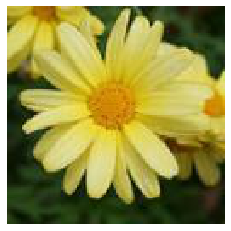

In [2]:
Img = imageio.imread("1879567877_8ed2a5faa7_n.jpg")
plt.imshow(Img)
plt.axis('off')
plt.show()

$$
SO(2) = \begin{bmatrix}
    cos(x) & -sin(x)\\
    sin(x) &  cos(x)
\end{bmatrix}
$$

In [3]:
def SO2(angle):
    cox = np.cos(angle)
    six = np.sin(angle)
    return np.asarray([[cox, -six], [six, cox]])

Rotate the image at its center.

In [4]:
indexSets = np.meshgrid(
    np.arange(-64,64),
    np.arange(-64,64)
)
indexSets = np.asarray(indexSets).transpose(1,2,0)
print(indexSets.shape)

(128, 128, 2)


In [5]:
rotatSets = np.matmul(indexSets, SO2(np.pi/3))

indexRot = np.round(rotatSets).astype(np.int32)

In [6]:
irotmax = indexRot.max((0,1))
irotmin = indexRot.min((0,1))
print(irotmax, irotmin)

[86 87] [-87 -87]


In [7]:
ImgRot = np.zeros((*(irotmax - irotmin+1), 3), dtype=Img.dtype)
print(ImgRot.shape)

(174, 175, 3)


In [8]:
for i,j in itertools.product(range(0,128), range(0,128)):
    w,h = indexRot[i,j] - irotmin
    ImgRot[w,h] = Img[i,j]

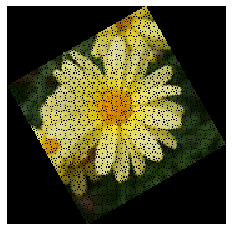

In [9]:
plt.imshow(ImgRot)
plt.axis('off')
plt.show()